# RaDICaL Dataset SDK

> The RaDICaL Dataset: A synchronized and calibrated low-level Radar, RGB-D and IMU dataset.

> youtube: https://youtu.be/l0AyUw59w7g

![CI](https://github.com/moodoki/radical_sdk/workflows/CI/badge.svg)

This is pre-alpha research quality code, and is being actively developed on.
Anything may change at anytime. Please check back here often.

Bug reports are very much appreciated.

# TODO

 - [ ] Radar config reader
 - [x] Read from aligned H5 dataset
 - [ ] Read from raw bags (to produce aligned/unaligned H5 datasets)
 - [x] Polar to Cartesian Projection
 - [ ] Camera/Radar coordinate transforms

## Install

`python -m pip install git+https://github.com/moodoki/radical_sdk.git`

## How to use

> Dataset is currently under review and will be made available soon.

Download the dataset at our [project page](https://publish.illinois.edu/radicaldata/).

A small sample to try things our can be found [here]().


Reading and displaying depth and RGB is easy

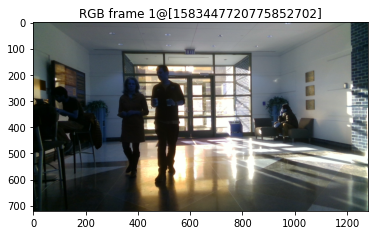

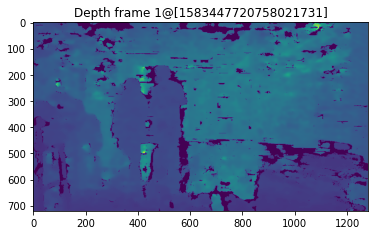

In [ ]:
#skip
import matplotlib.pyplot as plt
import numpy as np

from radicalsdk.h5dataset import H5DatasetLoader

data = H5DatasetLoader('../samples/indoor_sample.h5')


frame_idx = 1
plt.figure()
plt.imshow(data['rgb'][frame_idx])
plt.title(f'RGB frame {frame_idx}@{data["rgb_timestamp"][frame_idx]}')
plt.show()
plt.figure()
plt.imshow(data['depth'][frame_idx])
plt.title(f'Depth frame {frame_idx}@{data["depth_timestamp"][frame_idx]}')
plt.show()

The radar data is a 3D array arranged slow_time, antenna, fast_time.

`RadarFrame` encapsulates the necessary processing

In [ ]:
#skip

from radicalsdk.radar.config_v1 import read_radar_params
from radicalsdk.radar.v1 import RadarFrame

# Read config and configure RadarFrame object
radar_config = read_radar_params('../samples/indoor_human_rcs.cfg')
rf = RadarFrame(radar_config)

#Set raw cube to the required frame from the hdf5 file
rf.raw_cube = data['radar'][1]

# The desired view of the radar frame is now available

### Range Azimuth in Polar Coordinates

In [ ]:
# skip
plt.figure()
plt.imshow(np.log(np.abs(rf.range_azimuth_capon)))
plt.show()

### Projecting to cartesian

In [ ]:
#skip
from radicalsdk.geometry import PolarToCartesianWarp

p2c = PolarToCartesianWarp()

cartesian_radar = p2c(np.abs(rf.range_azimuth_capon)[np.newaxis, ..., np.newaxis])
plt.figure()
plt.imshow(np.log(cartesian_radar[0, ...]))
plt.show()